In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [3]:
# Funções que podem serem ulteis em algum momento

def histograma(df):
    for colunm in df.columns:
        plt.figure(figsize = (5, 3))
        df[colunm].hist(bins = 20)
        plt.title(colunm)
        plt.show()

def t_sne(df):
    features = df.drop('type', axis=1)
    labels = df['type']

    tsne = TSNE(n_components=2, random_state=0)
    tsne_results = tsne.fit_transform(features)

    tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
    tsne_df['type'] = labels

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='type', palette='bright', data=tsne_df, legend='full')
    plt.title('t-SNE: Distribuição das Classes')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

def normalizeSexo(sexo):
    maping = {"M":1, "I":2, "F":3}
    return maping.get(sexo)

In [5]:
# Lendo os dados e visualizando

date_train = pd.read_excel("./data/abalone_dataset.xlsx")
date_test = pd.read_excel("./data/abalone_app.xlsx")
date_train["sex"] = date_train["sex"].apply(normalizeSexo) #type: ignore
date_train2 = date_train.copy()
display(date_train)
print(date_train.info())

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,1,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,2,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,2,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,1,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,2,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1
...,...,...,...,...,...,...,...,...,...
3127,3,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.3800,3
3128,1,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,3
3129,2,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.1200,1
3130,3,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.2350,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3132 non-null   int64  
 1   length          3132 non-null   float64
 2   diameter        3132 non-null   float64
 3   height          3132 non-null   float64
 4   whole_weight    3132 non-null   float64
 5   shucked_weight  3132 non-null   float64
 6   viscera_weight  3132 non-null   float64
 7   shell_weight    3132 non-null   float64
 8   type            3132 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 220.3 KB
None


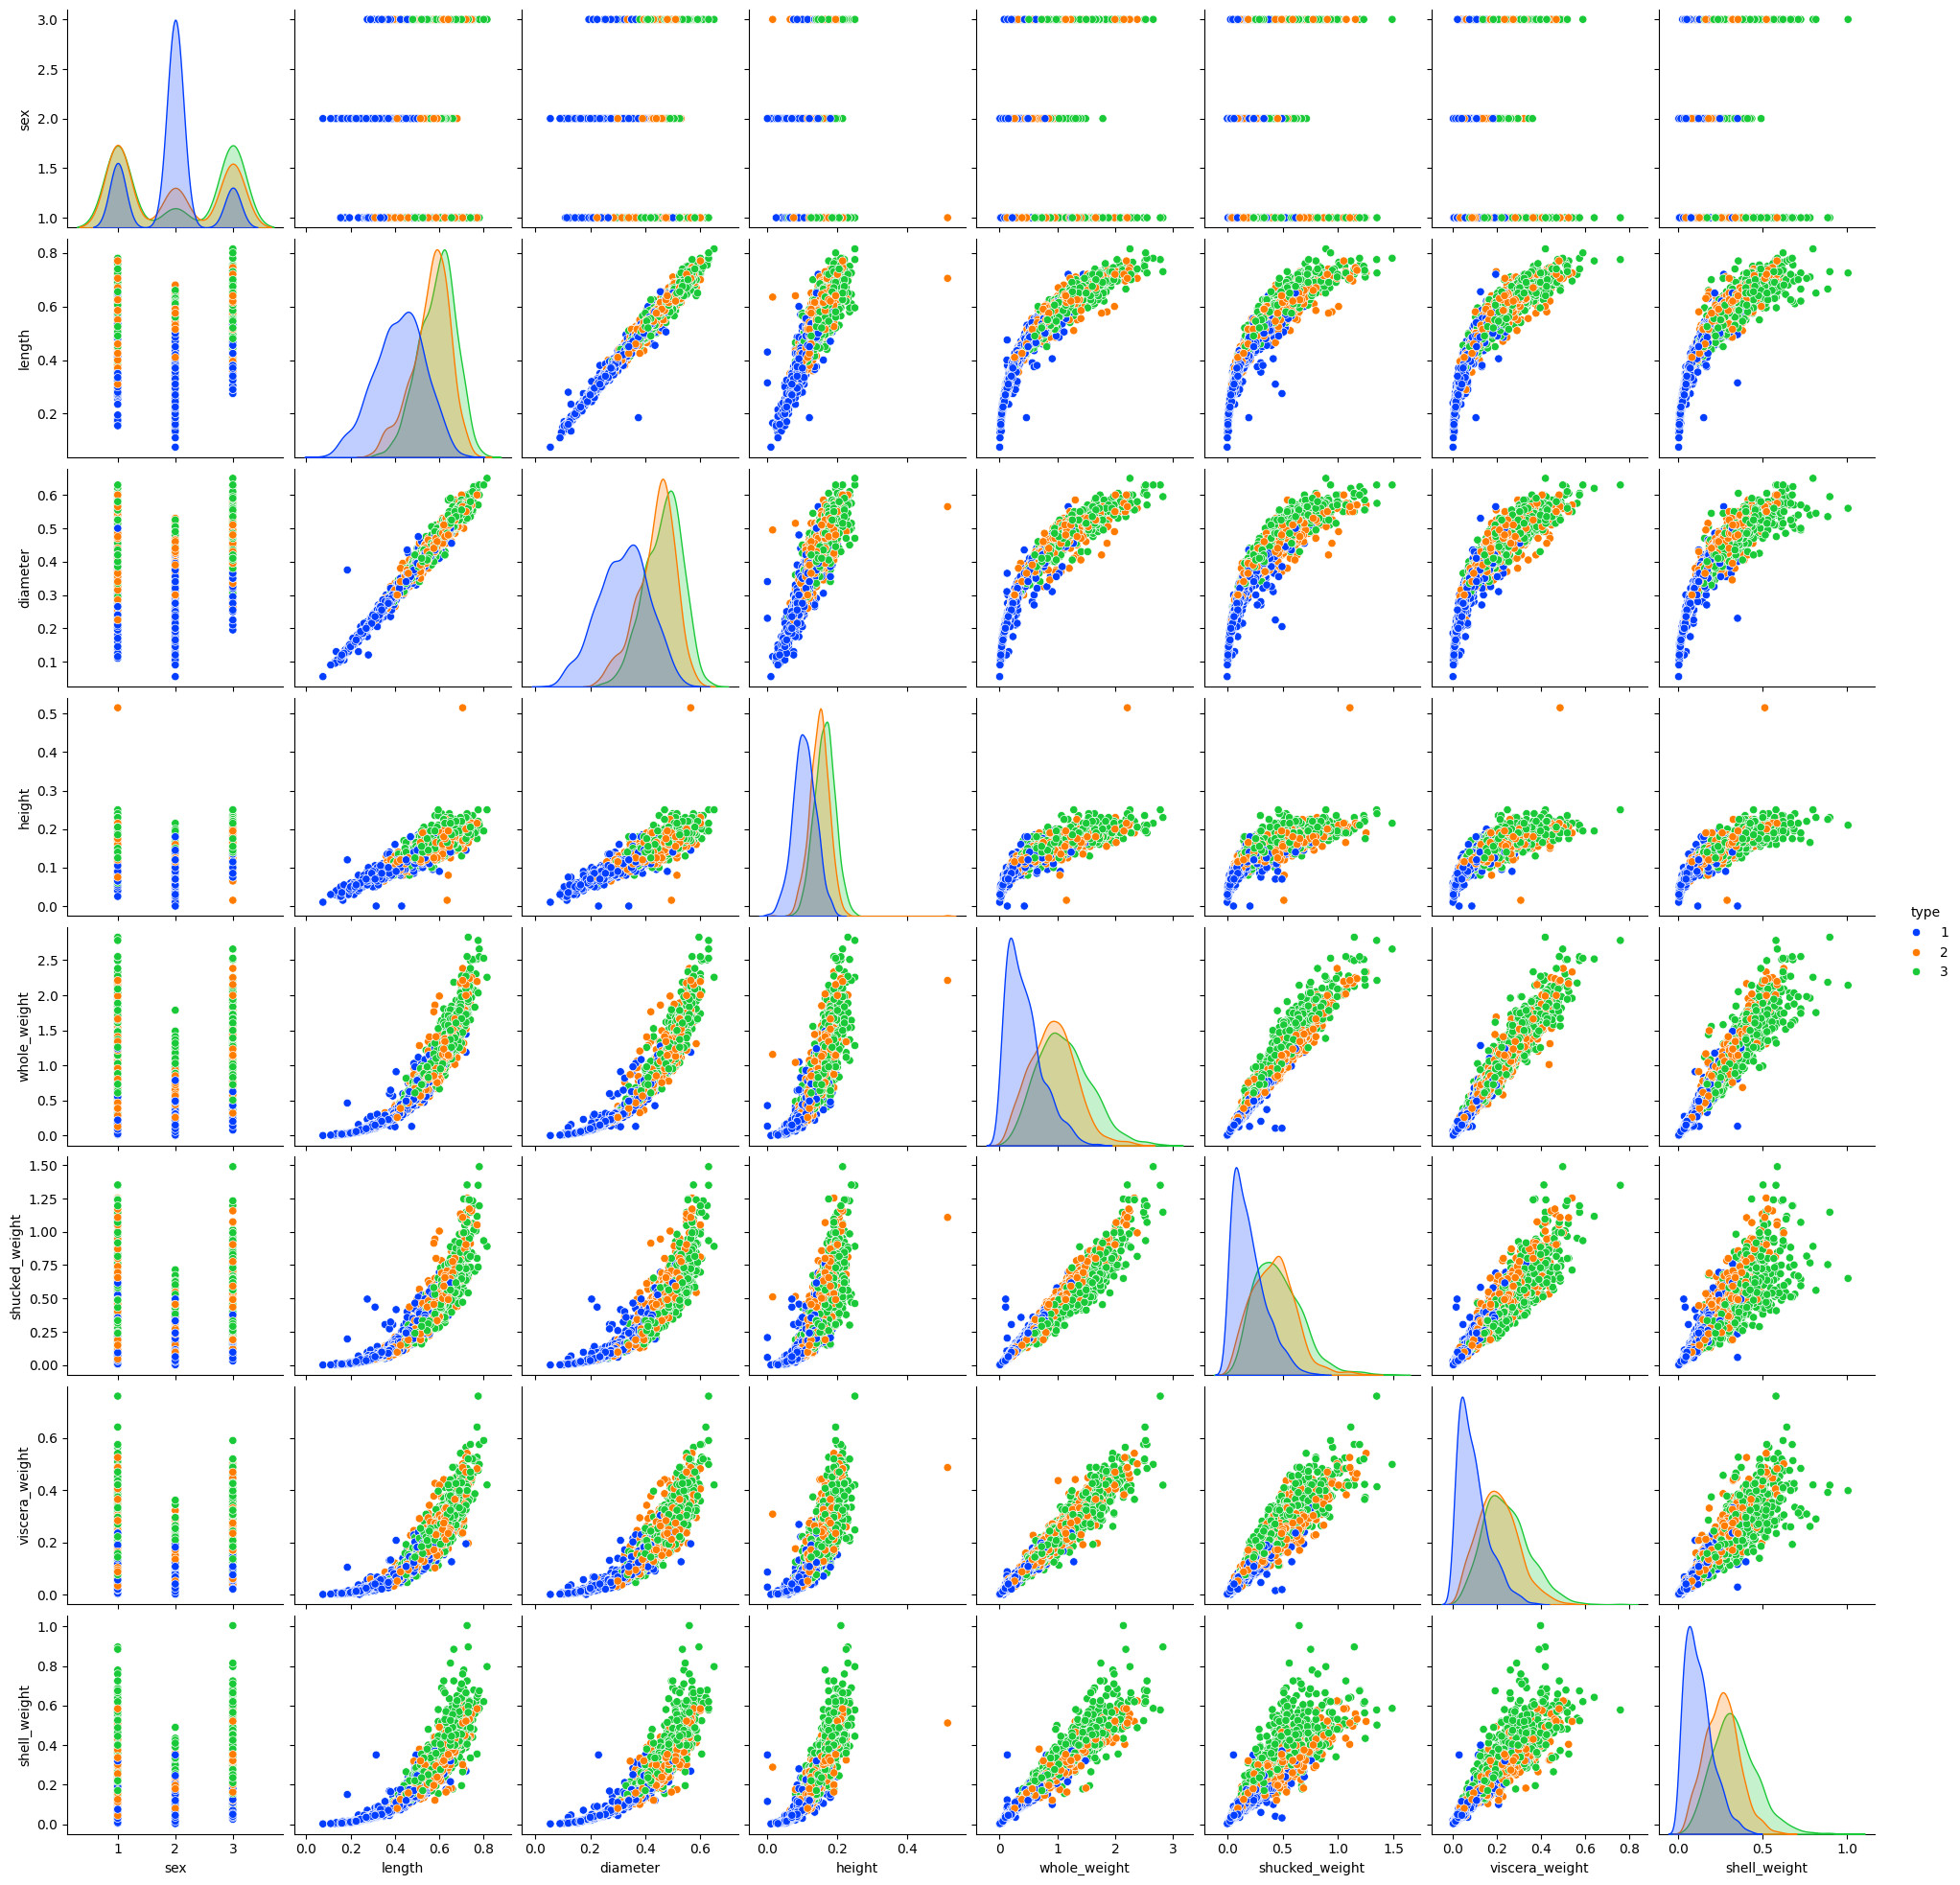

In [39]:
sns.pairplot(date_train, hue='type', palette='bright')


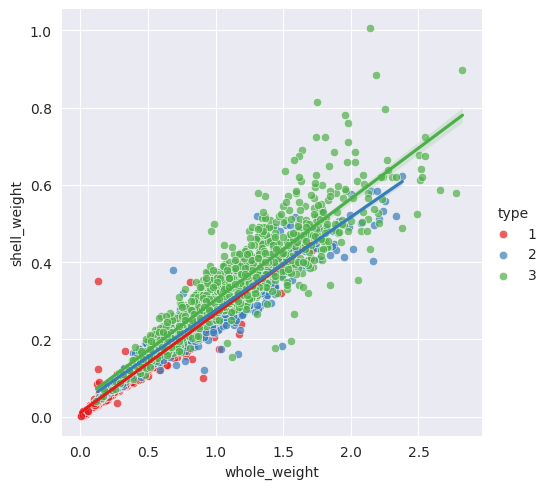

In [62]:
sns.set_style('darkgrid')
sns.lmplot(x = 'whole_weight', y = 'shell_weight', data = date_train, hue = 'type', palette = 'Set1', scatter_kws={'edgecolor':'white', 'alpha':0.7, 'linewidths':0.5})

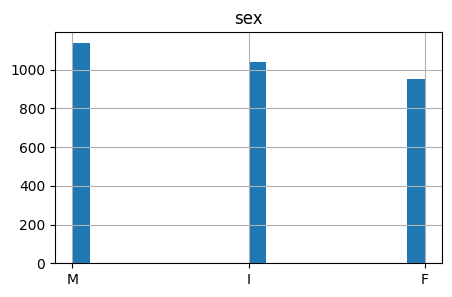

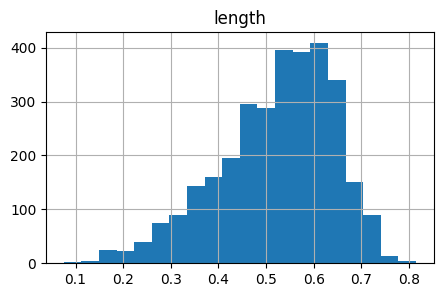

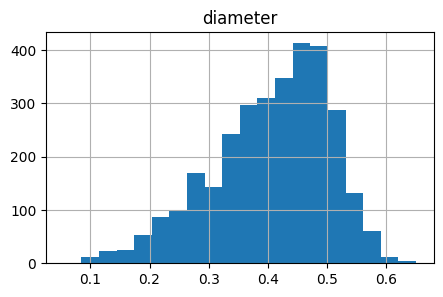

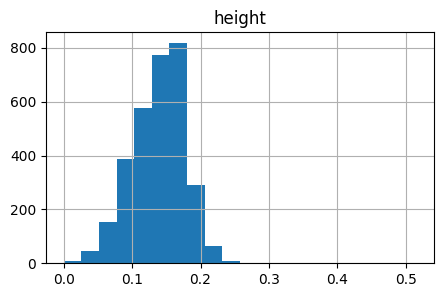

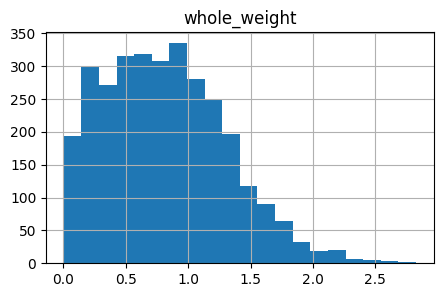

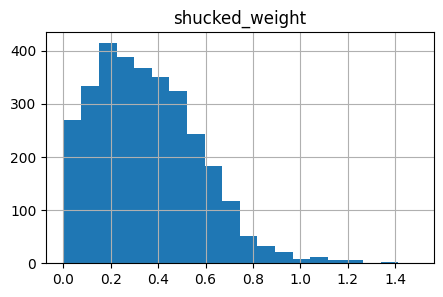

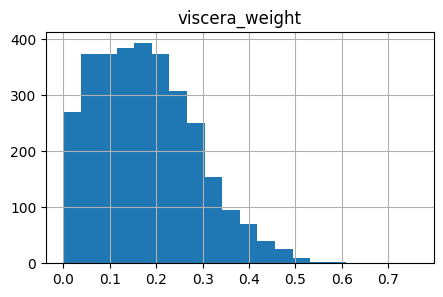

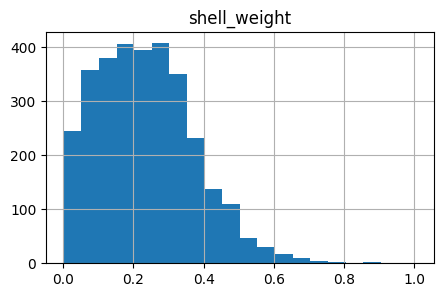

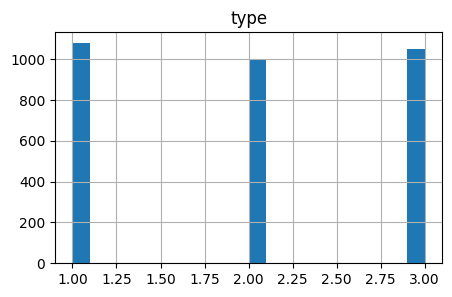

In [29]:
histograma(date_train)

<Axes: xlabel='type', ylabel='Count'>

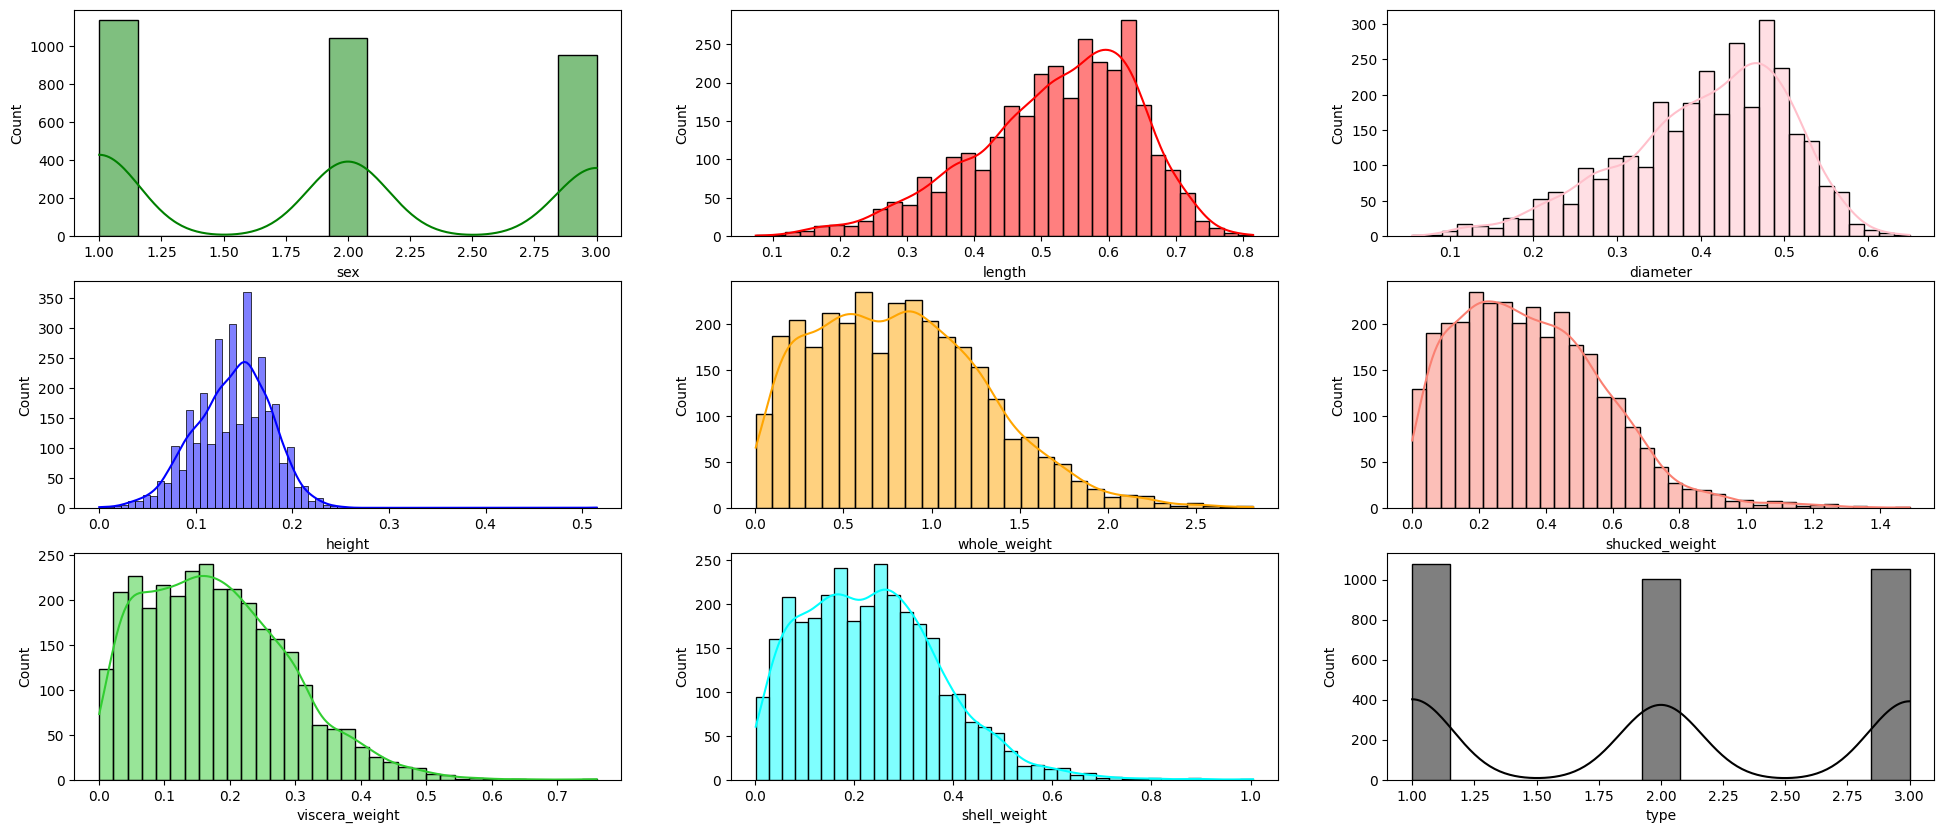

In [37]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(24, 10))

sns.histplot( date_train["sex"], ax=ax1, color="green",kde=True)
sns.histplot( date_train["length"], ax=ax2, color="red",kde=True)
sns.histplot( date_train["diameter"], ax=ax3, color="pink",kde=True)
sns.histplot( date_train["height"], ax=ax4, color="blue",kde=True)
sns.histplot( date_train["whole_weight"], ax=ax5, color="orange",kde=True)
sns.histplot( date_train["shucked_weight"], ax=ax6, color="salmon",kde=True)
sns.histplot( date_train["viscera_weight"], ax=ax7, color="limegreen",kde=True)
sns.histplot( date_train["shell_weight"], ax=ax8, color="cyan",kde=True)
sns.histplot( date_train["type"], ax=ax9, color="black",kde=True)


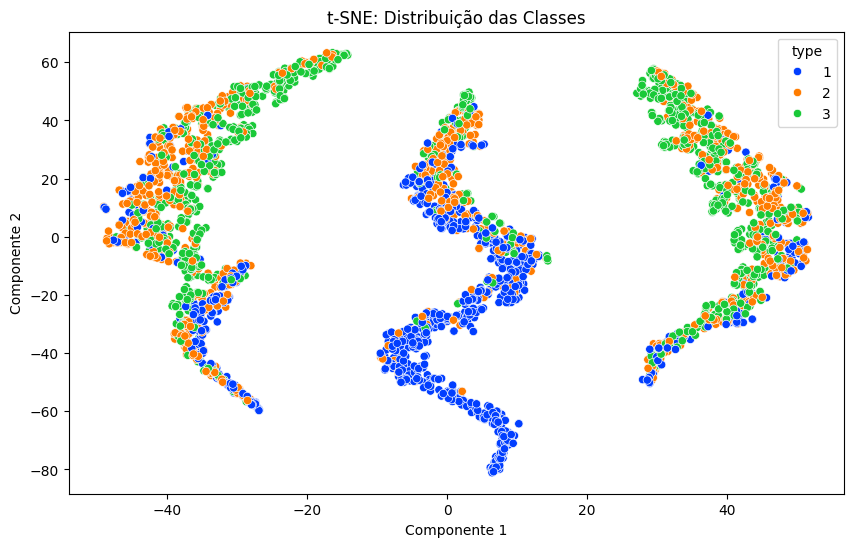

In [14]:
t_sne(date_train)

In [19]:
X_train_df = pd.DataFrame(X_train, columns=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
        'viscera_weight', 'shell_weight'])  # substitua os nomes das colunas conforme apropriado

# Resetando o índice de y_train para garantir alinhamento correto
y_train_reset = y_train.reset_index(drop=True)

# Combinando X_train_df e y_train
combined_df = pd.concat([X_train_df, y_train_reset], axis=1)

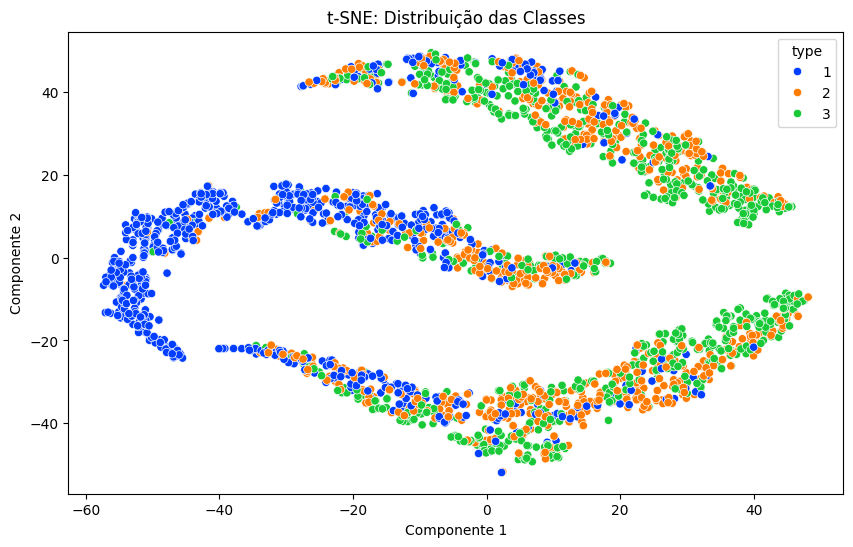

In [20]:
t_sne(combined_df)

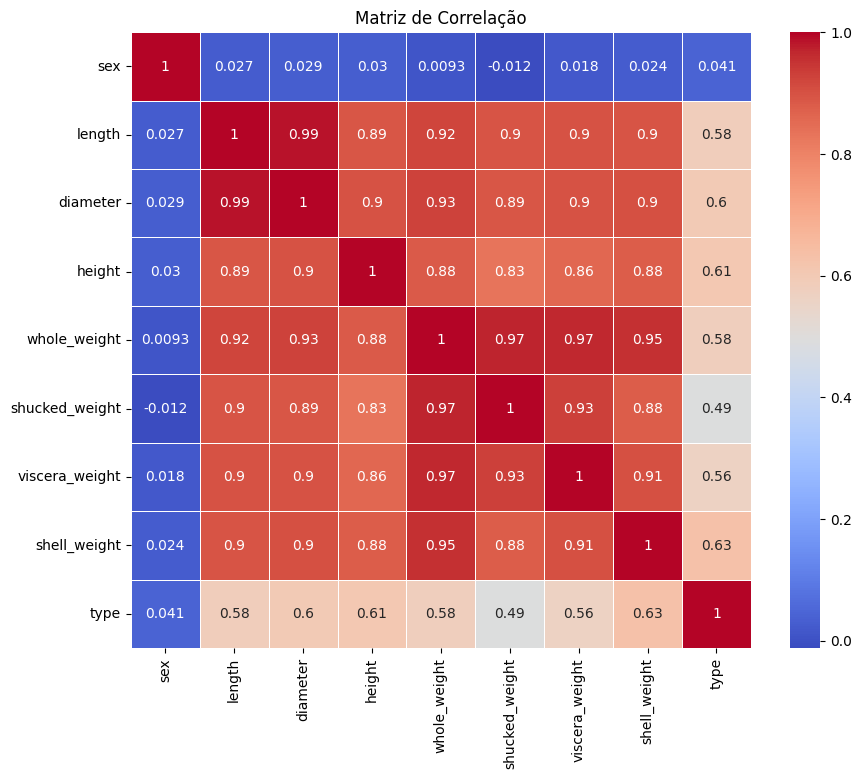

In [22]:
correlation_matrix = date_train.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [51]:
# separando os dados
X_train, X_test, y_train, y_test = train_test_split(date_train.drop(columns=["type", "length", "viscera_weight", ]), date_train["type"], test_size=0.2, random_state=42)
# normalizando os dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_mode = SVC(C=1, gamma=1)
svm_mode.fit(X_train, y_train)

y_pred = svm_mode.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 64.91%


In [50]:
date_test

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,M,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,F,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,F,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,M,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,F,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440
...,...,...,...,...,...,...,...,...
1040,I,0.430,0.350,0.105,0.3660,0.1705,0.0855,0.1100
1041,F,0.475,0.360,0.125,0.4470,0.1695,0.0810,0.1400
1042,F,0.500,0.405,0.150,0.5965,0.2530,0.1260,0.1850
1043,I,0.380,0.275,0.095,0.2425,0.1060,0.0485,0.2100


In [15]:
X_train

array([[-1.15751922,  0.44226755,  0.64330548, ..., -0.03533423,
        -0.05001951,  0.02983688],
       [ 1.29559892, -0.05270853,  0.19206495, ..., -0.23517669,
        -0.05909224,  0.13753857],
       [ 0.06903985, -0.58893261, -0.71041613, ..., -0.72467844,
        -0.97997393, -0.90357775],
       ...,
       [ 1.29559892, -0.91891666, -1.01124315, ..., -0.82123154,
        -1.03441029, -0.90357775],
       [ 0.06903985, -0.71267663, -0.8106918 , ..., -0.78530481,
        -1.07070119, -0.88562747],
       [-1.15751922,  0.7722516 ,  0.74358116, ...,  0.63829204,
         1.23377122,  0.67604701]])

In [9]:
param_grid = {
    'C': [ 10, 100],
    'gamma': [0.1, 0.01, 0.001],
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................C=10, gamma=0.1;, score=0.683 total time=   0.1s
[CV 2/5] END ...................C=10, gamma=0.1;, score=0.669 total time=   0.1s
[CV 3/5] END ...................C=10, gamma=0.1;, score=0.651 total time=   0.1s
[CV 4/5] END ...................C=10, gamma=0.1;, score=0.647 total time=   0.1s
[CV 5/5] END ...................C=10, gamma=0.1;, score=0.683 total time=   0.1s
[CV 1/5] END ..................C=10, gamma=0.01;, score=0.661 total time=   0.1s
[CV 2/5] END ..................C=10, gamma=0.01;, score=0.635 total time=   0.1s
[CV 3/5] END ..................C=10, gamma=0.01;, score=0.655 total time=   0.1s
[CV 4/5] END ..................C=10, gamma=0.01;, score=0.633 total time=   0.1s
[CV 5/5] END ..................C=10, gamma=0.01;, score=0.663 total time=   0.1s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.639 total time=   0.1s
[CV 2/5] END .................C=10, gamma=0.001;,

In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(svm_mode, X_train, y_train, cv=kf)
print("Accuracy: {:.2f}%".format(scores.mean() * 100))

Accuracy: 65.67%


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Supondo que você já tenha os valores de y_test e y_pred
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Precision: 0.6640656106721157
Recall: 0.6637292212319897
F1 Score: 0.6624890399751862


In [13]:
def boxplots(df):
    for col in df.columns:
            if col == 'type':
                continue
            plt.figure()
            sns.boxplot(x='type', y=col, data=df)
            plt.title(col)
            quartis = df.groupby('type')[col].describe(percentiles=[.25, .5, .75])
            plt.show()
            print(quartis)

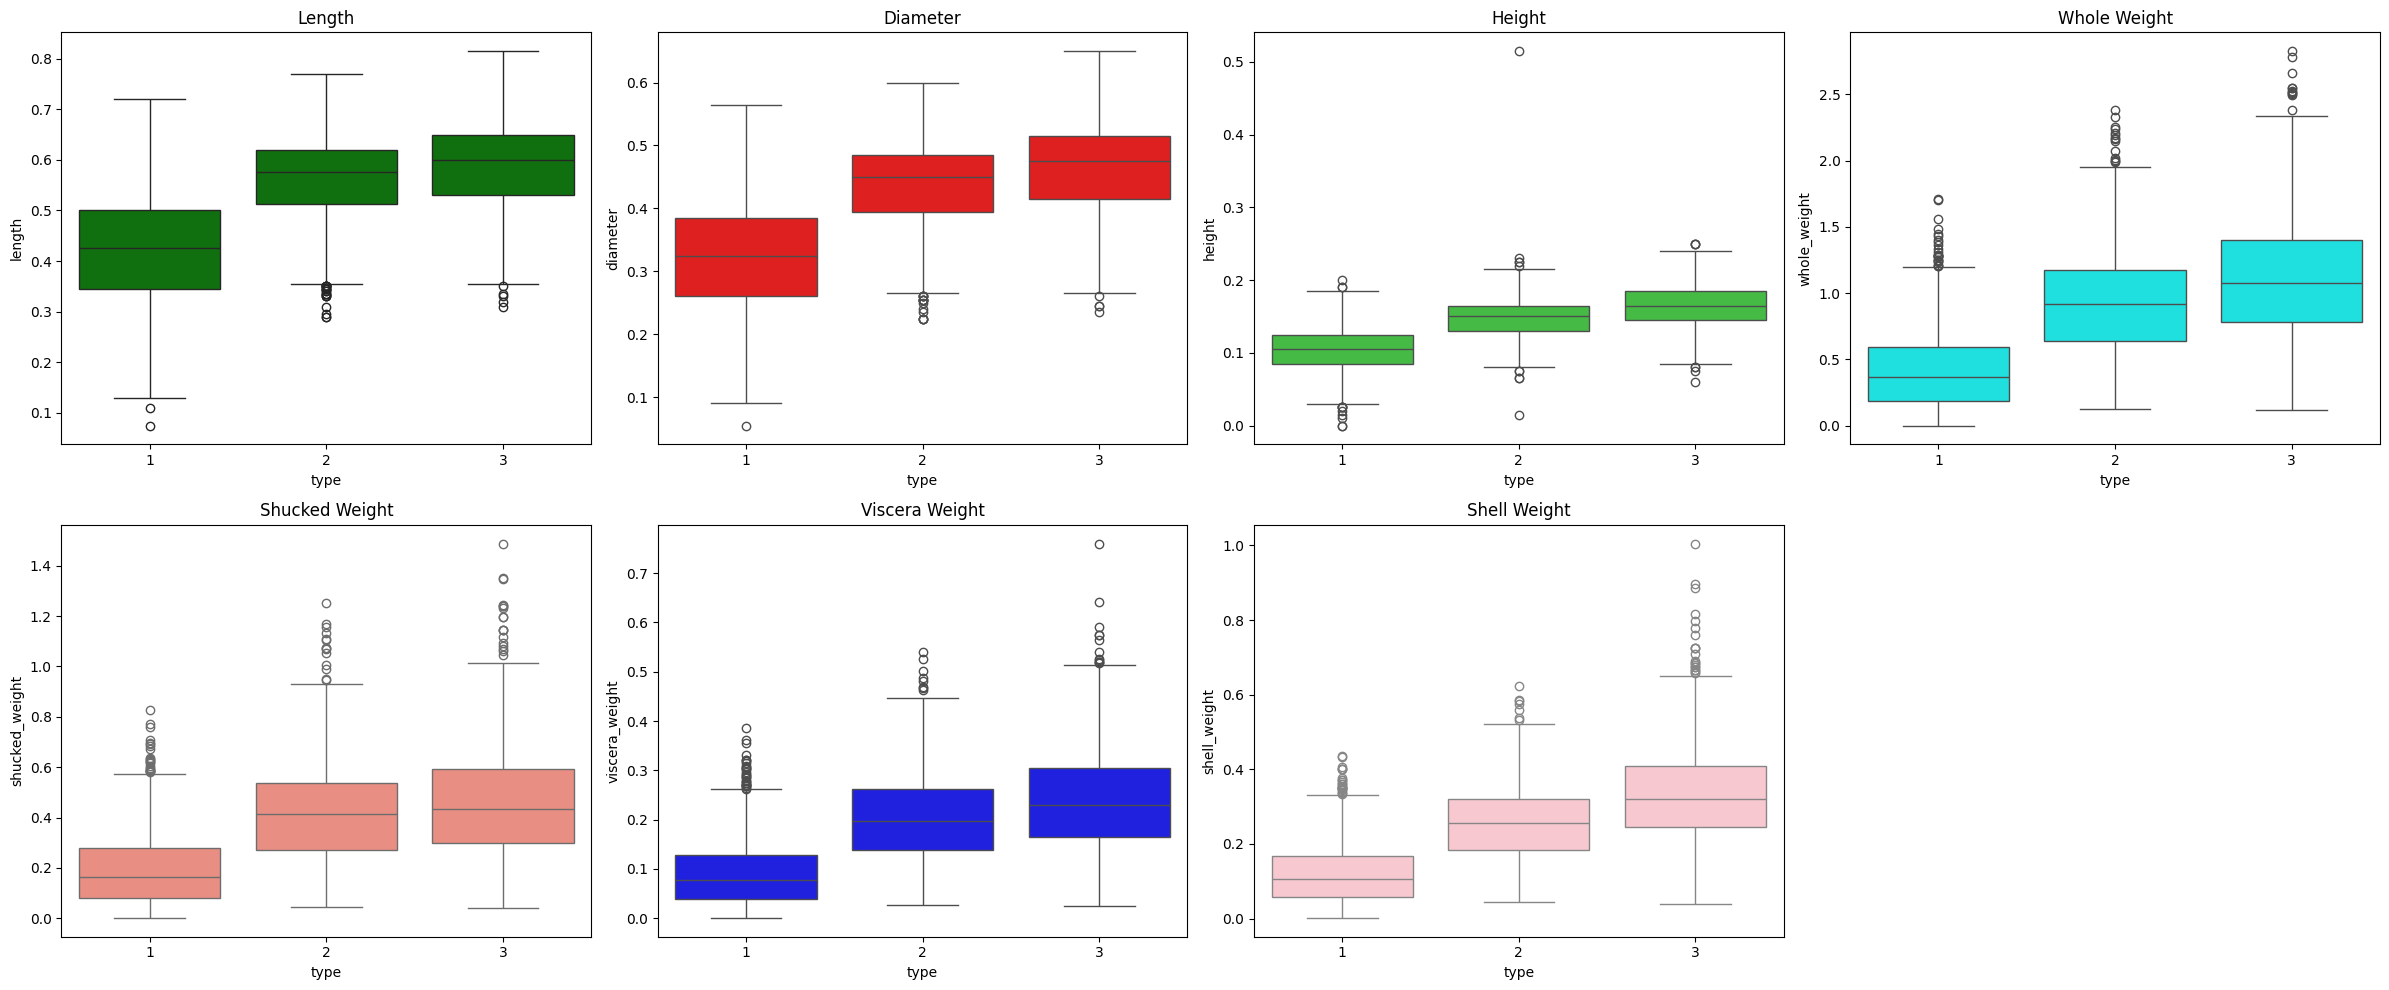

In [24]:

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(24, 10))

sns.boxplot(x='type', y='length', data=date_train, ax=ax1, color="green")
ax1.set_title('Length')

sns.boxplot(x='type', y='diameter', data=date_train, ax=ax2, color="red")
ax2.set_title('Diameter')

sns.boxplot(x='type', y='height', data=date_train, ax=ax3, color="limegreen")
ax3.set_title('Height')

sns.boxplot(x='type', y='whole_weight', data=date_train, ax=ax4, color="cyan")
ax4.set_title('Whole Weight')

sns.boxplot(x='type', y='shucked_weight', data=date_train, ax=ax5, color="salmon")
ax5.set_title('Shucked Weight')

sns.boxplot(x='type', y='viscera_weight', data=date_train, ax=ax6, color="blue")
ax6.set_title('Viscera Weight')

sns.boxplot(x='type', y='shell_weight', data=date_train, ax=ax7, color="pink")
ax7.set_title('Shell Weight')

# Se você não está usando o ax8, pode escondê-lo
ax8.set_visible(False)

plt.tight_layout()
plt.show()


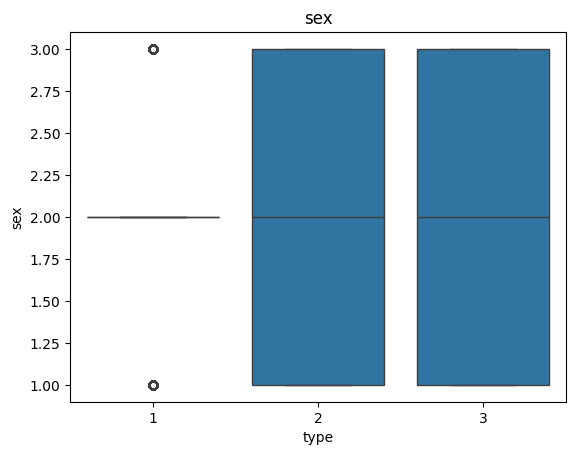

       count      mean       std  min  25%  50%  75%  max
type                                                     
1     1022.0  1.924658  0.583144  1.0  2.0  2.0  2.0  3.0
2      988.0  1.900810  0.879969  1.0  1.0  2.0  3.0  3.0
3      981.0  2.012232  0.942128  1.0  1.0  2.0  3.0  3.0


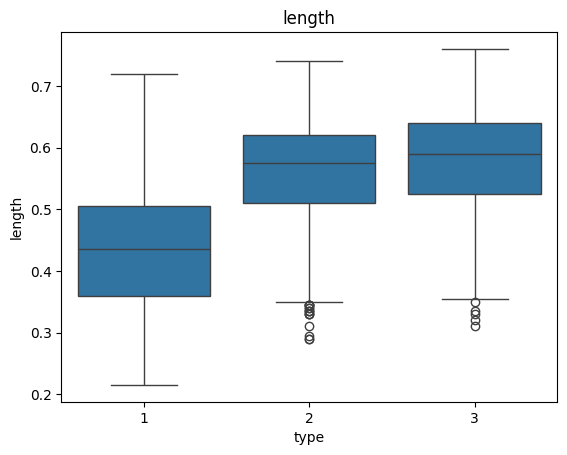

       count      mean       std    min    25%    50%    75%   max
type                                                              
1     1022.0  0.432074  0.100301  0.215  0.360  0.435  0.505  0.72
2      988.0  0.557566  0.083633  0.290  0.510  0.575  0.620  0.74
3      981.0  0.580851  0.078282  0.310  0.525  0.590  0.640  0.76


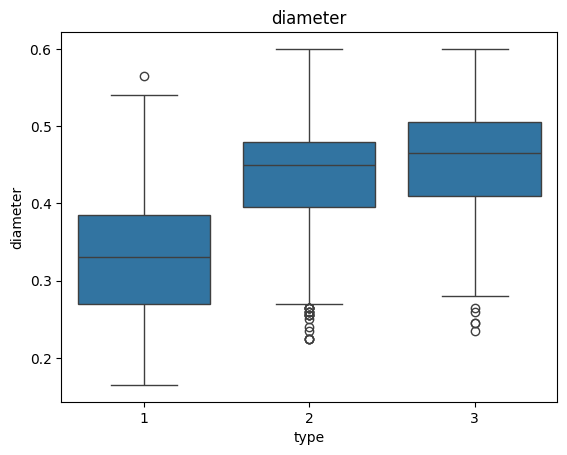

       count      mean       std    min    25%    50%    75%    max
type                                                               
1     1022.0  0.330181  0.081807  0.165  0.270  0.330  0.385  0.565
2      988.0  0.435106  0.068192  0.225  0.395  0.450  0.480  0.600
3      981.0  0.457197  0.064473  0.235  0.410  0.465  0.505  0.600


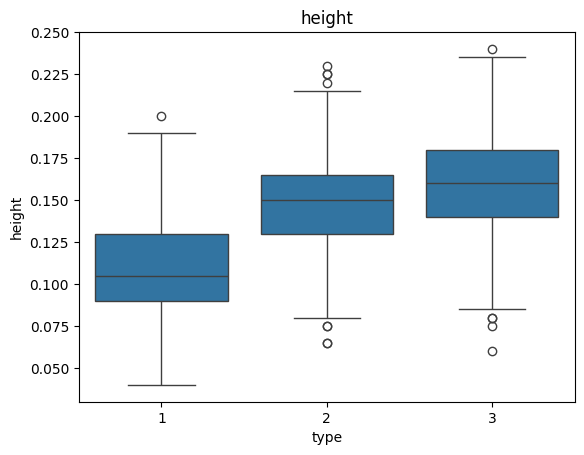

       count      mean       std    min   25%    50%    75%   max
type                                                             
1     1022.0  0.108821  0.028813  0.040  0.09  0.105  0.130  0.20
2      988.0  0.146847  0.026642  0.065  0.13  0.150  0.165  0.23
3      981.0  0.159867  0.027493  0.060  0.14  0.160  0.180  0.24


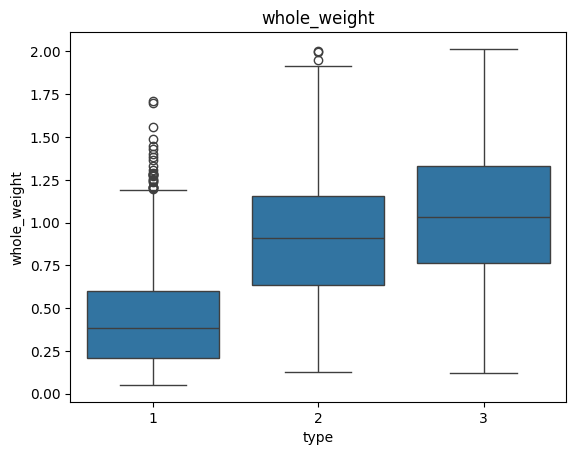

       count      mean       std     min      25%      50%       75%    max
type                                                                       
1     1022.0  0.450569  0.303583  0.0515  0.20775  0.38525  0.602375  1.710
2      988.0  0.905831  0.370947  0.1295  0.63425  0.90950  1.158250  2.003
3      981.0  1.051229  0.390824  0.1200  0.76200  1.03100  1.331500  2.015


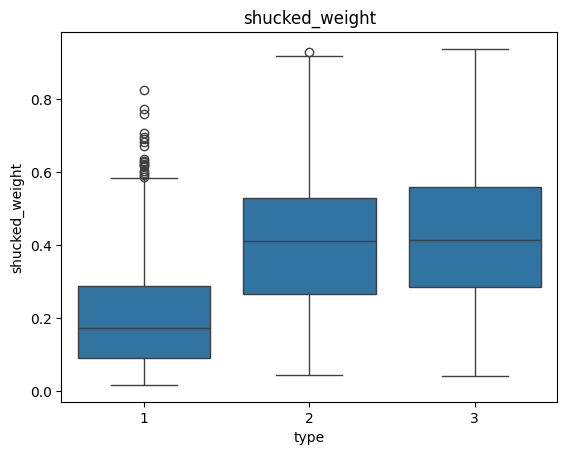

       count      mean       std     min       25%      50%       75%     max
type                                                                         
1     1022.0  0.206409  0.145219  0.0180  0.090750  0.17275  0.288875  0.8255
2      988.0  0.406945  0.180462  0.0455  0.267125  0.41150  0.531000  0.9290
3      981.0  0.431008  0.183304  0.0415  0.286500  0.41450  0.559000  0.9380


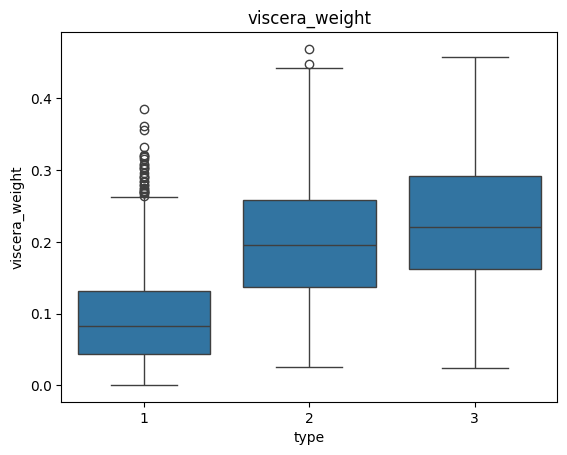

       count      mean       std     min     25%      50%       75%     max
type                                                                       
1     1022.0  0.097136  0.067622  0.0005  0.0440  0.08225  0.131375  0.3855
2      988.0  0.199704  0.086287  0.0260  0.1370  0.19600  0.259000  0.4690
3      981.0  0.228533  0.089653  0.0240  0.1615  0.22100  0.292500  0.4575


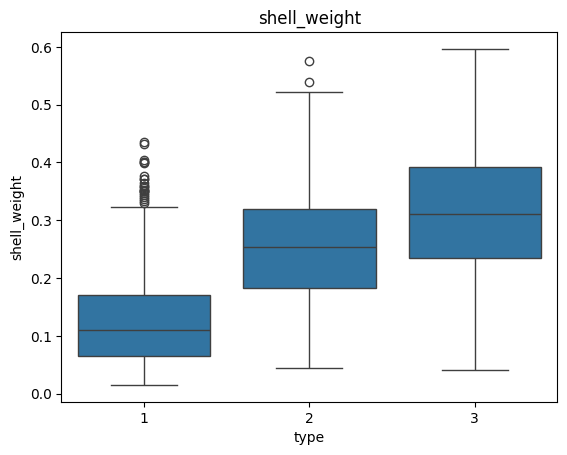

       count      mean       std    min      25%      50%       75%     max
type                                                                       
1     1022.0  0.126127  0.079595  0.015  0.06500  0.11000  0.170000  0.4350
2      988.0  0.253261  0.096807  0.044  0.18225  0.25375  0.318625  0.5755
3      981.0  0.313797  0.110436  0.040  0.23500  0.31000  0.392500  0.5965


In [23]:
boxplots(date_train)

In [17]:
df =date_train.copy()
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,1,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,2,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,2,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,1,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,2,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1
...,...,...,...,...,...,...,...,...,...
3127,3,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.3800,3
3128,1,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450,3
3129,2,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.1200,1
3130,3,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.2350,3


In [22]:
Q1 = date_train.quantile(0.25)
Q3 = date_train.quantile(0.75)
IQR = Q3 - Q1

# Remover outliers
date_train = date_train[~((date_train < (Q1 - 1.5 * IQR)) |(date_train > (Q3 + 1.5 * IQR))).any(axis=1)]
date_train

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,1,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.240,3
1,2,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.166,1
3,1,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.220,3
4,2,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.225,1
5,3,0.700,0.575,0.205,1.7730,0.6050,0.4470,0.538,3
...,...,...,...,...,...,...,...,...,...
3127,3,0.545,0.405,0.175,0.9800,0.2585,0.2070,0.380,3
3128,1,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.445,3
3129,2,0.450,0.340,0.120,0.4925,0.2410,0.1075,0.120,1
3130,3,0.520,0.410,0.155,0.7270,0.2910,0.1835,0.235,3


In [32]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

X = date_train.drop(columns=["type", "sex"]).values
y = date_train["type"].values
loo = LeaveOneOut()

model = SVC(C=10, gamma=0.1)
accuracies = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = accuracy_score(y_test, y_pred)
    accuracies.append(res)
    print(f"Acurácia: {np.mean(accuracies)*100:.2f}")

average_accuracy = np.mean(accuracies)
print(f"Acurácia Média: {average_accuracy}")


Acurácia: 100.00
Acurácia: 100.00
Acurácia: 66.67
Acurácia: 50.00
Acurácia: 60.00
Acurácia: 50.00
Acurácia: 57.14
Acurácia: 62.50
Acurácia: 55.56
Acurácia: 60.00
Acurácia: 54.55
Acurácia: 50.00
Acurácia: 46.15
Acurácia: 42.86
Acurácia: 46.67
Acurácia: 43.75
Acurácia: 47.06
Acurácia: 50.00
Acurácia: 52.63
Acurácia: 55.00
Acurácia: 57.14
Acurácia: 54.55
Acurácia: 56.52
Acurácia: 54.17
Acurácia: 56.00
Acurácia: 57.69
Acurácia: 59.26
Acurácia: 60.71
Acurácia: 62.07
Acurácia: 63.33
Acurácia: 64.52
Acurácia: 65.62
Acurácia: 66.67
Acurácia: 67.65
Acurácia: 68.57
Acurácia: 69.44
Acurácia: 70.27
Acurácia: 68.42
Acurácia: 69.23
Acurácia: 67.50
Acurácia: 68.29
Acurácia: 69.05
Acurácia: 69.77
Acurácia: 70.45
Acurácia: 71.11
Acurácia: 69.57
Acurácia: 70.21
Acurácia: 70.83
Acurácia: 69.39
Acurácia: 68.00
Acurácia: 68.63
Acurácia: 69.23
Acurácia: 69.81
Acurácia: 68.52
Acurácia: 69.09
Acurácia: 69.64
Acurácia: 68.42
Acurácia: 67.24
Acurácia: 67.80
Acurácia: 68.33
Acurácia: 68.85
Acurácia: 69.35
Acurác